In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [24]:
dataCH = fetch_california_housing()
# dir(dataCH)
# dataCH.data[0]
# dataCH['feature_names']
# dataCH.target[0]
print(dataCH)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [25]:
dfCH = pd.DataFrame(
    dataCH.data,
    columns = dataCH['feature_names']
)
dfCH['PRICE'] = dataCH.target
dfCH

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


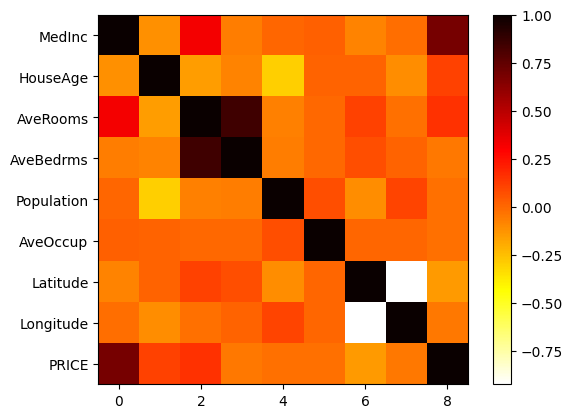

In [26]:
import matplotlib.pyplot as plt
plt.imshow(dfCH.corr(), cmap='hot_r')
plt.yticks(np.arange(9), dfCH.columns)
plt.colorbar()

In [27]:
dfCH.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Splitting datasets: 
#### 90% training + 10% testing

In [28]:
x = dfCH[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
    'Population', 'AveOccup', 'Latitude', 'Longitude' ]]
y = dfCH['PRICE']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .02)

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Dictionary of models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_train, y_train) * 100  # R^2 score in %
    print(f'{name} Accuracy: {score:.2f}%')


Linear Regression Accuracy: 60.66%
Ridge Regression Accuracy: 60.66%
Lasso Regression Accuracy: 28.53%
Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 97.40%
Support Vector Regressor Accuracy: -1.80%


In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Apply scaling to sensitive models only
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge()),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso()),
    'SVR': make_pipeline(StandardScaler(), SVR()),
    'Decision Tree': DecisionTreeRegressor(),  # no scaling
    'Random Forest': RandomForestRegressor()   # no scaling
}

# Evaluate all models
best_model = None
best_score = float('-inf')

for name, model in models.items():
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train) * 100
    test_score = model.score(x_test, y_test) * 100

    print(f"{name}:")
    print(f"  Train Accuracy: {train_score:.2f}%")
    print(f"  Test Accuracy : {test_score:.2f}%\n")

    if test_score > best_score:
        best_score = test_score
        best_model = name

print(f"🏆 Best model based on test accuracy: {best_model} ({best_score:.2f}%)")


Linear Regression:
  Train Accuracy: 60.70%
  Test Accuracy : 57.22%

Ridge Regression:
  Train Accuracy: 60.70%
  Test Accuracy : 57.22%

Lasso Regression:
  Train Accuracy: 0.00%
  Test Accuracy : -0.31%

SVR:
  Train Accuracy: 75.06%
  Test Accuracy : 70.25%

Decision Tree:
  Train Accuracy: 100.00%
  Test Accuracy : 59.22%

Random Forest:
  Train Accuracy: 97.40%
  Test Accuracy : 80.89%

🏆 Best model based on test accuracy: Random Forest (80.89%)


In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define models and their hyperparameter grids
model_configs = {
    'Linear Regression': (
        make_pipeline(StandardScaler(), LinearRegression()),
        {}
    ),
    'Ridge Regression': (
        make_pipeline(StandardScaler(), Ridge()),
        {'ridge__alpha': [0.1, 1.0, 10.0]}
    ),
    'Lasso Regression': (
        make_pipeline(StandardScaler(), Lasso()),
        {'lasso__alpha': [0.01, 0.1, 1.0]}
    ),
    'SVR': (
        make_pipeline(StandardScaler(), SVR()),
    {
        'svr__C': [1],                   # try 1 fixed value
        'svr__kernel': ['linear'],       # only linear kernel (much faster)
        'svr__epsilon': [0.1]            # one value
    }
    ),
    'Decision Tree': (
        DecisionTreeRegressor(),
        {'max_depth': [None, 5, 10, 20]}
    ),
    'Random Forest': (
        RandomForestRegressor(),
        {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10]
        }
    )
}

best_model = None
best_score = float('-inf')

print("Comparing models with GridSearchCV...\n")

for name, (model, param_grid) in model_configs.items():
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid.fit(x_train, y_train)

    train_score = grid.score(x_train, y_train) * 100
    test_score = grid.score(x_test, y_test) * 100

    print(f"{name}:")
    print(f"  Best Parameters : {grid.best_params_}")
    print(f"  Train Accuracy  : {train_score:.2f}%")
    print(f"  Test Accuracy   : {test_score:.2f}%\n")

    if test_score > best_score:
        best_score = test_score
        best_model = (name, grid.best_estimator_)

print(f"🏆 Best model: {best_model[0]} with Test Accuracy: {best_score:.2f}%")


Comparing models with GridSearchCV...

Linear Regression:
  Best Parameters : {}
  Train Accuracy  : 60.70%
  Test Accuracy   : 57.22%

Ridge Regression:
  Best Parameters : {'ridge__alpha': 10.0}
  Train Accuracy  : 60.70%
  Test Accuracy   : 57.23%

Lasso Regression:
  Best Parameters : {'lasso__alpha': 0.01}
  Train Accuracy  : 60.28%
  Test Accuracy   : 57.11%

SVR:
  Best Parameters : {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}
  Train Accuracy  : 7.77%
  Test Accuracy   : 50.02%

Decision Tree:
  Best Parameters : {'max_depth': 10}
  Train Accuracy  : 82.33%
  Test Accuracy   : 69.13%

Random Forest:
  Best Parameters : {'max_depth': None, 'n_estimators': 100}
  Train Accuracy  : 97.42%
  Test Accuracy   : 80.64%

🏆 Best model: Random Forest with Test Accuracy: 80.64%
